In [1]:
import pandas as pd
from os import walk

def load_stepwise_dist(file, col) :
    return pd.read_csv(file, sep = '\\s+', names = col,
            skiprows = 1, comment = '#', skip_blank_lines = True)

name   = "../temp_"
suffix = ".dist"

c4  = ["lvl", "tab", "0", "1", "2", "3", "4", "used", "space"]
c8  = ["lvl", "tab", "0", "1", "2", "3", "4", 
       "5", "6", "7", "8", "used", "space"]
c16 = ["lvl", "tab", "0", "1", "2", "3", "4", 
       "5", "6", "7", "8", "9", "10", 
       "11", "12", "13", "14", "15", "16", "used", "space"]

static  = load_stepwise_dist(name+"static"+suffix , c8)
dynamic = load_stepwise_dist(name+"dynamic"+suffix, c8)

IOError: File ../temp_static.dist does not exist

In [ ]:
static_grouped  = static .groupby(['lvl', 'tab']).mean()[['used', 'space']]
dynamic_grouped = dynamic.groupby(['lvl', 'tab']).mean()[['used', 'space']]

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 

lvl  = 0
plvl = 0
tl = 128
for tlvl in range(26) :
    plvl = lvl
    lvl = tlvl * 10
    fig = plt.figure  (figsize=(10,6))
    ax  = fig.add_axes([0.1,0.15,0.8,0.8])

    ax.plot(range(tl), static_grouped ['space'][lvl])
    ax.plot(range(tl), static_grouped ['used' ][lvl])
    ax.plot(range(tl), dynamic_grouped['used' ][lvl])

    height = static_grouped['space'][lvl][0]
    ax.set_ylim([0,height+200])
    ax.set_xlim([0,128])

    plt.savefig("../plots/lvl/dist_lvl"+str(lvl)+".pdf")
    plt.show()

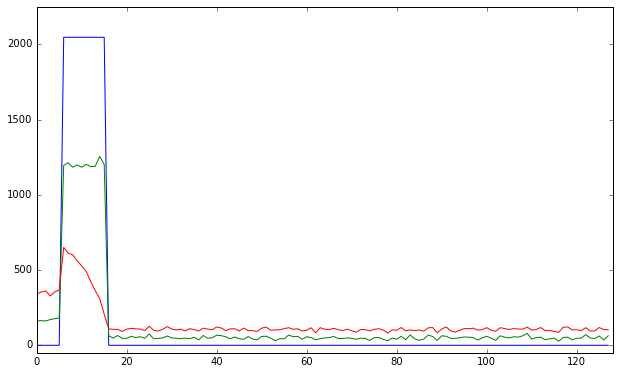

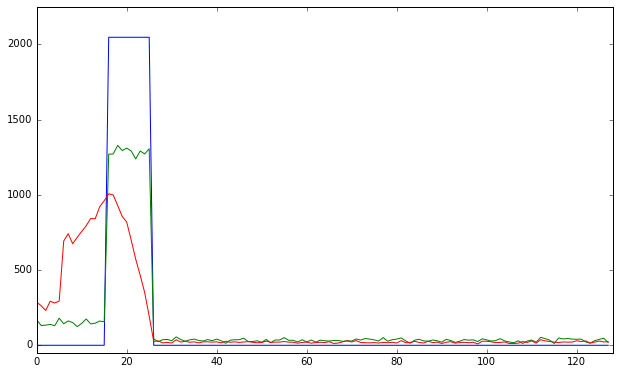

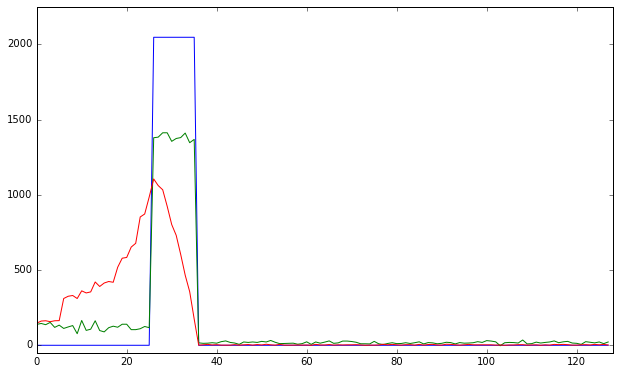

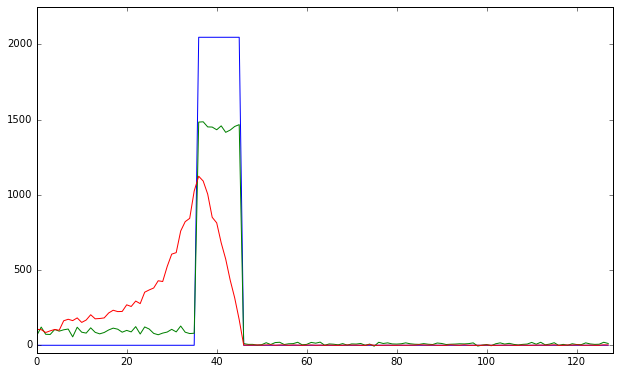

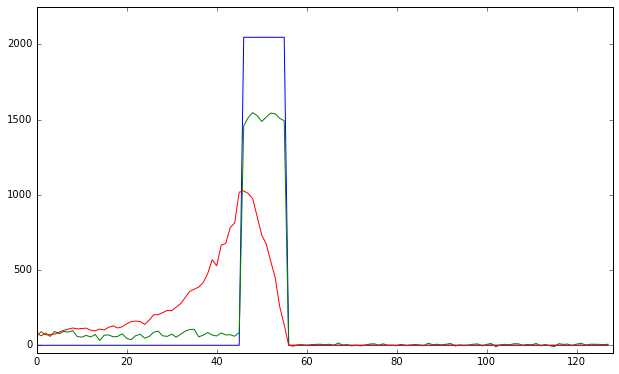

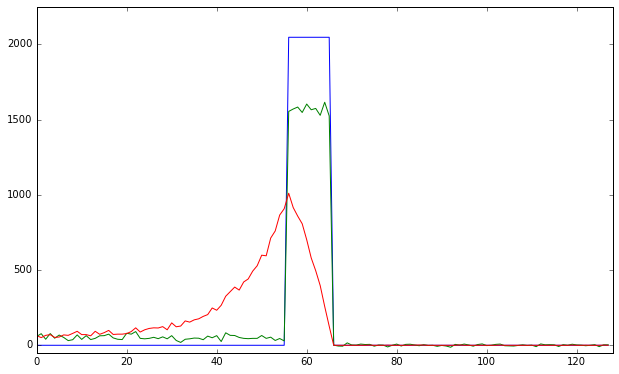

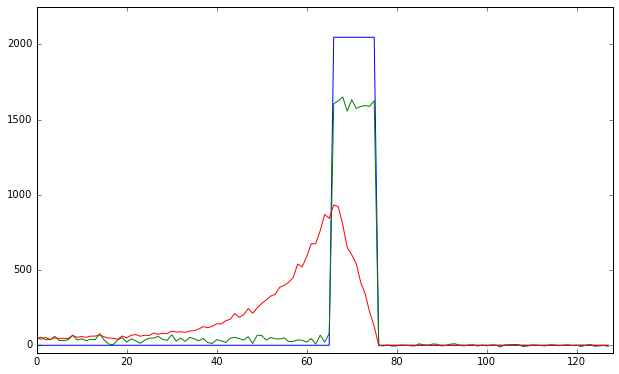

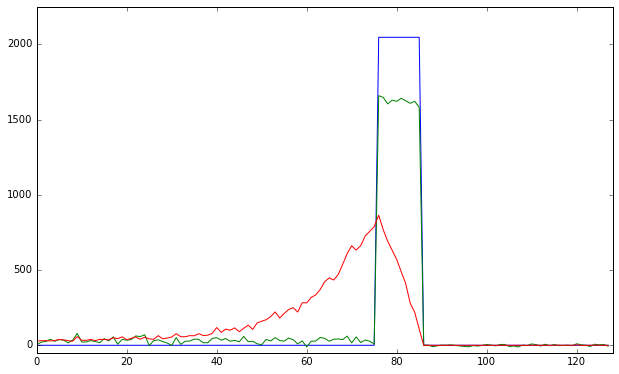

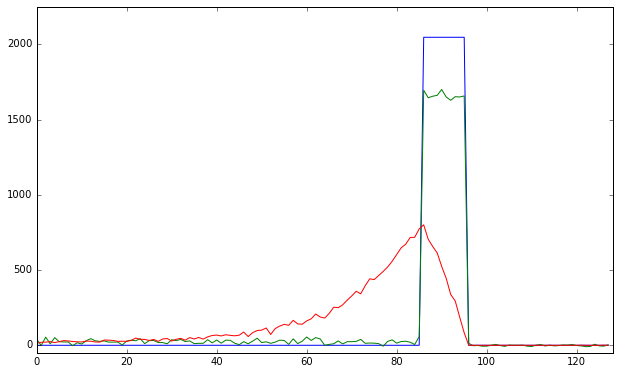

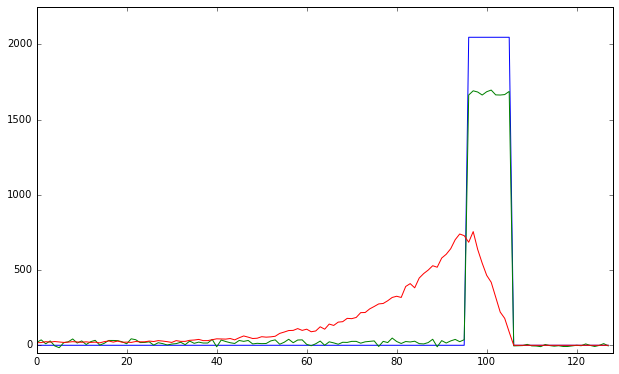

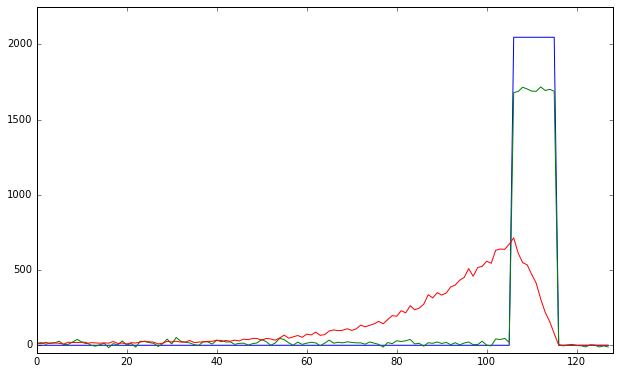

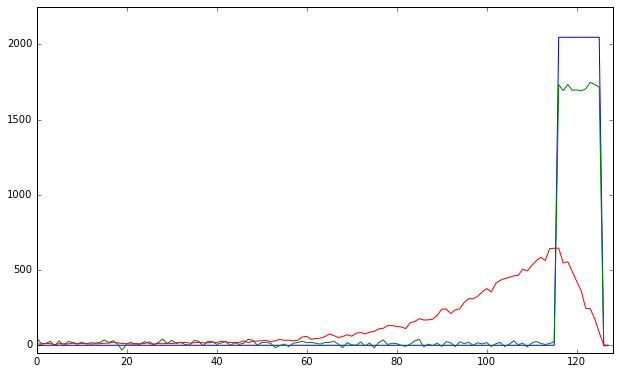

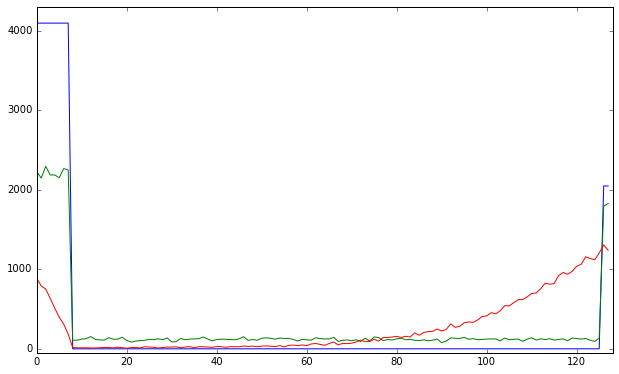

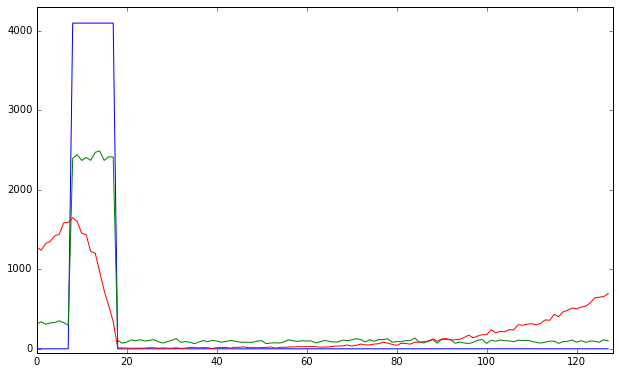

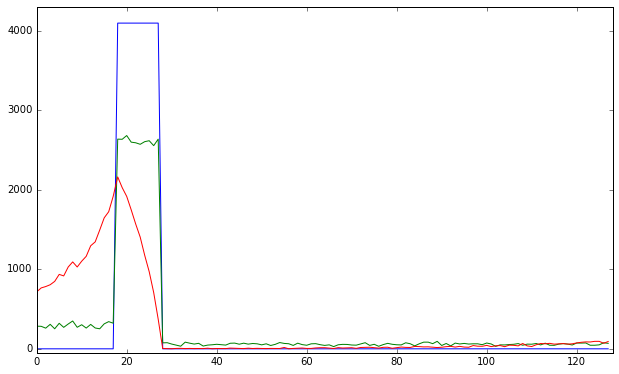

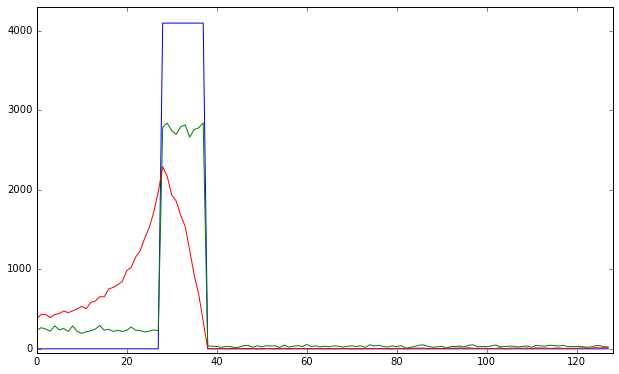

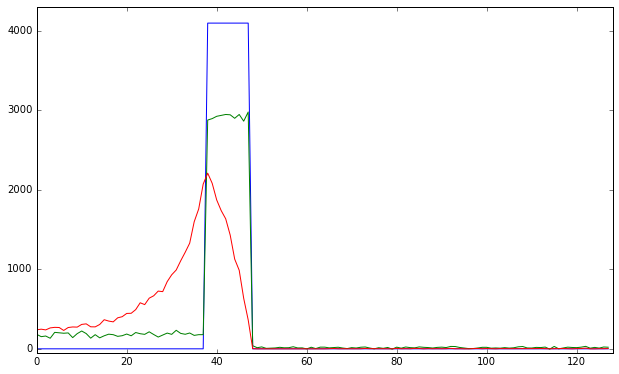

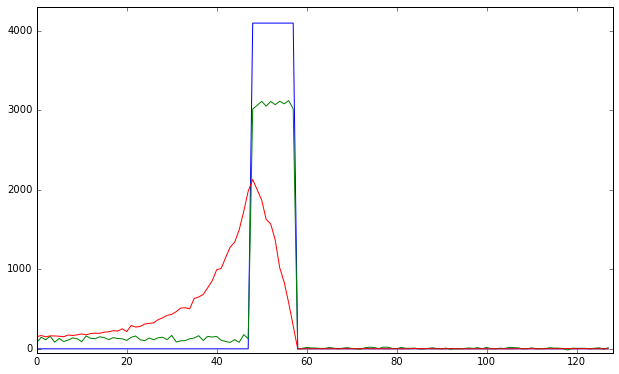

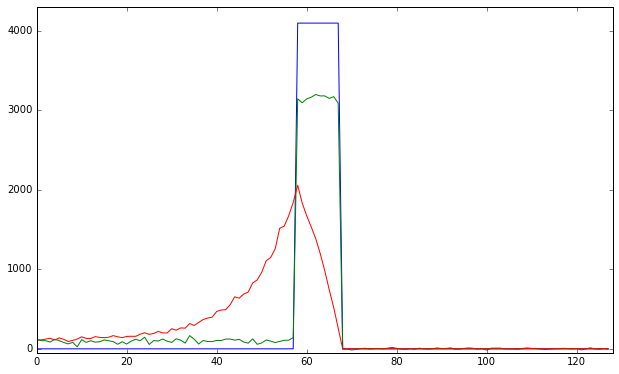

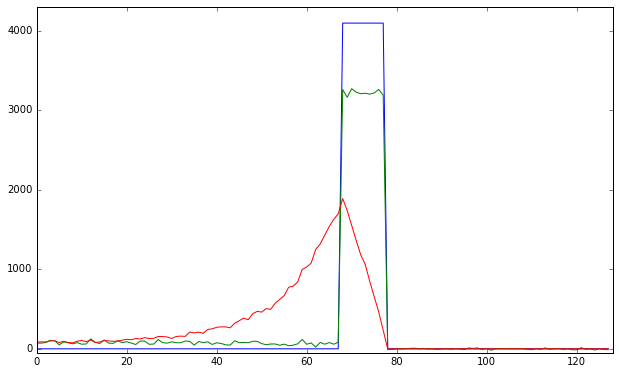

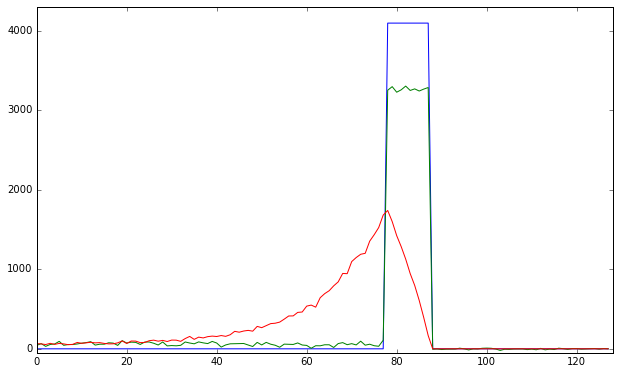

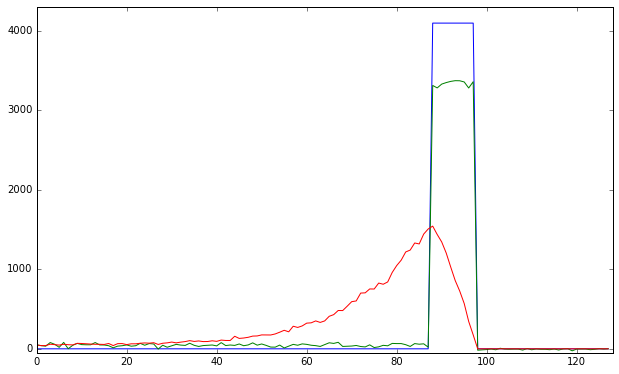

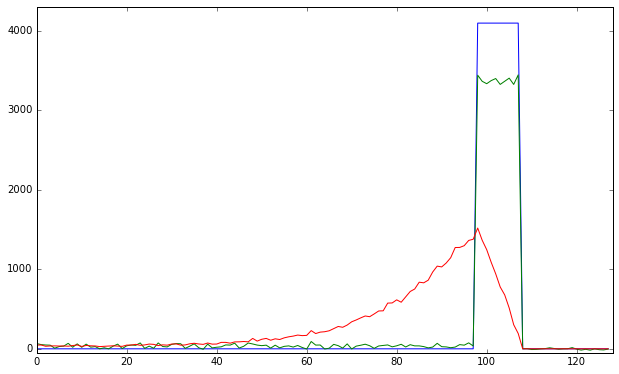

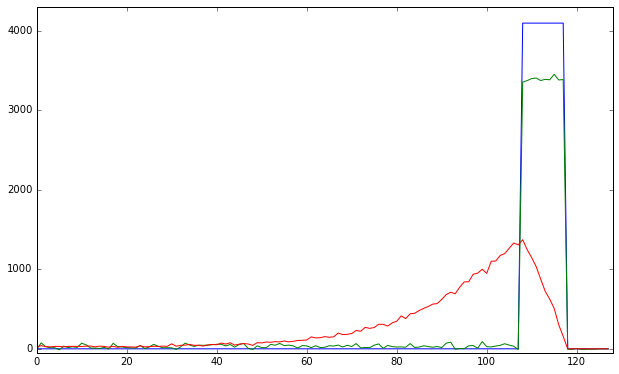

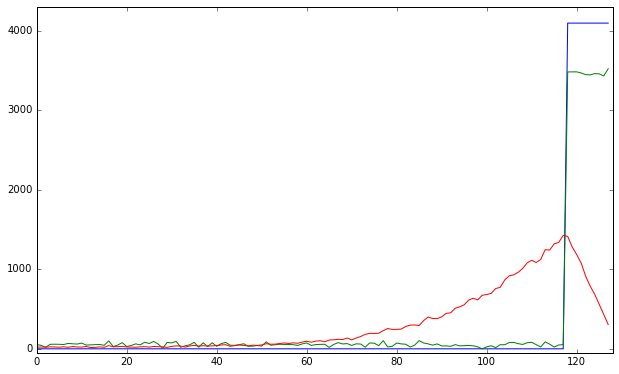

In [7]:
lvl  = 0
plvl = 0
tl = 128
for tlvl in range(1,26) :
    plvl = lvl
    lvl = tlvl * 10
    fig = plt.figure  (figsize=(10,6))
    ax  = fig.add_axes([0.1,0.15,0.8,0.8])

    ax.plot(range(tl), static_grouped ['space'][lvl]-static_grouped ['space'][plvl])
    ax.plot(range(tl), static_grouped ['used' ][lvl]-static_grouped ['used'] [plvl])
    ax.plot(range(tl), dynamic_grouped['used' ][lvl]-dynamic_grouped['used'] [plvl])

    height = static_grouped['space'][lvl][0]/2
    ax.set_ylim([-50,height+200])
    ax.set_xlim([0,128])

    plt.savefig("../plots/lvl/diff_lvl"+str(lvl)+".pdf")
    plt.show()